In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
import numpy as np
from torch.autograd import Variable

In [2]:
transformers=transforms.Compose([
                        transforms.ToTensor()])

In [3]:
def dataloader(train_bsize, test_bsize):
    train_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=True,download=True,
                            transform=transformers),batch_size=train_bsize, shuffle=True)
    test_dataloader=torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='data',train=False,download=True,
                            transform= transformers),batch_size=test_bsize, shuffle=True)
    return (train_dataloader,test_dataloader)


In [4]:
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 10)
        self.l2 = nn.Linear(10, 9)
        self.l3 = nn.Linear(9, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 20)
        self.l2 = nn.Linear(20, 11)
        self.l3 = nn.Linear(11, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 40)
        self.l2 = nn.Linear(40, 12)
        self.l3 = nn.Linear(12, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 60)
        self.l2 = nn.Linear(60, 20)
        self.l3 = nn.Linear(20, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 100)
        self.l2 = nn.Linear(100, 15)
        self.l3 = nn.Linear(15, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 140)
        self.l2 = nn.Linear(140, 30)
        self.l3 = nn.Linear(30, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 180)
        self.l2 = nn.Linear(180, 40)
        self.l3 = nn.Linear(40, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 220)
        self.l2 = nn.Linear(220, 100)
        self.l3 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 300)
        self.l2 = nn.Linear(300, 120)
        self.l3 = nn.Linear(120, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x
    
class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 350)
        self.l2 = nn.Linear(350, 100)
        self.l3 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.leaky_relu(self.l1(x))
        x = F.leaky_relu(self.l2(x))
        x = self.l3(x)
        return x

In [5]:
train_dataloader, test_dataloader= dataloader(200,100)

In [7]:
def cal_params(model):
    return sum(p.numel() for p in model.parameters())

In [8]:
def train_model(model,optimizer,loader,Floss):
    for b_index,(data,t) in enumerate(train_dataloader):
        #forward propagation
        optimizer.zero_grad()
        output=model(data.view(-1, 784))
        loss=Floss(output,t)
        loss.backward()
        optimizer.step()

In [9]:
def cal_loss_acc(model, loader, Floss):
    total_loss = 0
    loss_counter = 0
    correct_samples = 0
    total_samples = 0
    for data, target in loader:
        data, target = Variable(data), Variable(target)
        pred = model(data.view(-1, 784))
        loss = Floss(pred, target)
        total_loss += loss.data

        pred = np.argmax(pred.data, axis = 1)
        correct_samples  += np.equal(pred, target.data).sum()
    total_loss = (total_loss) / len(loader.dataset)
    return total_loss.data.numpy().tolist(), correct_samples/len(loader.dataset)

In [10]:
def compute(model):
    optimizer = optim.Adam(model.parameters(), lr = 0.0001)
    epochs=10
    Floss = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train_model(model, optimizer, train_dataloader, Floss)
        train_loss, train_acc = cal_loss_acc(model, train_dataloader, Floss)
        test_loss, test_acc = cal_loss_acc(model, test_dataloader, Floss)
    loss_train_arr.append(train_loss)
    loss_test_arr.append(test_loss)
    param_arr.append(cal_params(model))
    print("Model Train loss: ", train_loss)
    print("Model Test loss: ", test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)

In [11]:
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []


In [12]:
model1 = Model1()
print("Model 1 parameters: ", (cal_params(model1)))
compute(model1)

model2 = Model2()
print("Model 2 parameters: ", (cal_params(model2)))
compute(model2)

model3 = Model3()
print("Model 3 parameters: ", (cal_params(model3)))
compute(model3)

model4 = Model4()
print("Model 4 parameters: ", (cal_params(model4)))
compute(model4)

model5 = Model5()
print("Model 5 parameters: ", (cal_params(model5)))
compute(model5)

model6 = Model6()
print("Model 6 parameters: ", (cal_params(model6)))
compute(model6)

model7 = Model7()
print("Model 7 parameters: ", (cal_params(model7)))
compute(model7)

model8 = Model8()
print("Model 8 parameters: ", (cal_params(model8)))
compute(model8)

model9 = Model9()
print("Model 9 parameters: ", (cal_params(model9)))
compute(model9)

model10 = Model10()
print("Model 10 parameters: ", (cal_params(model10)))
compute(model10)


Model 1 parameters:  8049
Model Train loss:  0.002532043494284153
Model Test loss:  0.004979768302291632
Model 2 parameters:  16051
Model Train loss:  0.0020266170613467693
Model Test loss:  0.003967743832617998
Model 3 parameters:  32022
Model Train loss:  0.0016979221254587173
Model Test loss:  0.0032425427343696356
Model 4 parameters:  48530
Model Train loss:  0.0014011114835739136
Model Test loss:  0.002779068425297737
Model 5 parameters:  80175
Model Train loss:  0.0013415347784757614
Model Test loss:  0.0026291983667761087
Model 6 parameters:  114440
Model Train loss:  0.0011649946682155132
Model Test loss:  0.0023186285980045795
Model 7 parameters:  148950
Model Train loss:  0.0010043743532150984
Model Test loss:  0.0020180558785796165
Model 8 parameters:  195810
Model Train loss:  0.0008820922812446952
Model Test loss:  0.0017992929788306355
Model 9 parameters:  272830
Model Train loss:  0.0007576434873044491
Model Test loss:  0.0015925223706290126
Model 10 parameters:  310860


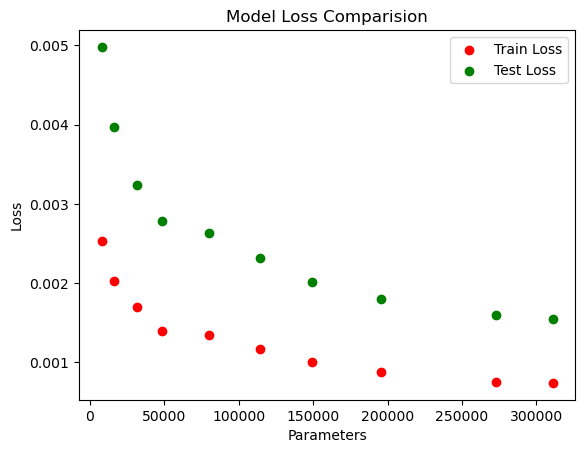

In [13]:
plt.scatter(param_arr, loss_train_arr, color = "r")
plt.scatter(param_arr, loss_test_arr, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()
    

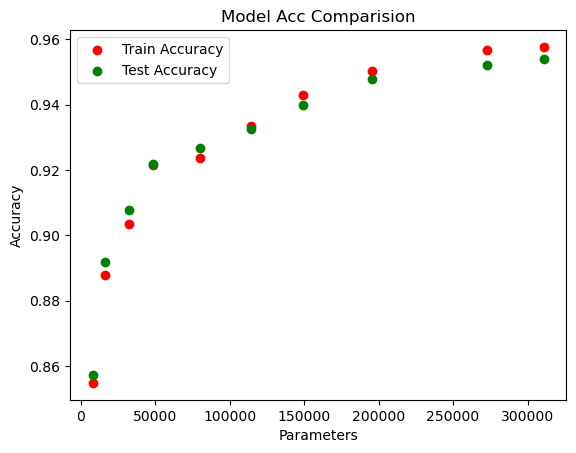

In [14]:
plt.scatter(param_arr, train_acc_arr, color = "r")
plt.scatter(param_arr, test_acc_arr, color = "g")
plt.title('Model Acc Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()